In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data = pd.read_csv('G:/Default Prediction/Data/train_02.08_1.csv')
train_data

,customer_ID,S_2,S_11,S_15,B_23,B_38,R_10,R_16,D_45,D_47,D_63,D_64,D_119,D_129,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.401619,0.108271,0.050882,2.0,0.007121,0.005055,0.708906,0.525351,CR,O,0.236266,1.000080,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.406326,0.101018,0.040469,2.0,0.005966,0.003753,0.712795,0.521311,CR,O,0.241885,1.008344,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.406768,0.103239,0.047454,2.0,0.005447,0.007381,0.720884,0.524568,CR,O,0.239710,1.006878,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.405175,0.206394,0.031705,2.0,0.001888,0.008802,0.723997,0.530929,CR,O,0.240727,1.007573,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.487460,0.106020,0.032733,2.0,0.006111,0.007166,0.720619,0.529305,CR,O,0.242325,1.008132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.483833,0.204409,0.009346,3.0,0.006990,0.000894,0.738777,0.530723,CL,O,0.016141,1.005537,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.244838,0.203718,0.007823,3.0,0.005149,0.007411,0.744180,0.534473,CL,O,0.030034,1.008500,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.800476,0.200470,0.013041,3.0,0.006422,0.006695,0.747021,0.530051,CL,O,0.025865,1.003554,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.965168,0.209341,0.001800,3.0,0.000041,0.000243,0.748190,0.531355,CL,O,0.027028,1.005416,0


In [3]:
train_data_2 = train_data[['customer_ID','S_11','S_15','B_23','R_10','R_16','D_47', 'target']]
train_data_2

,customer_ID,S_11,S_15,B_23,R_10,R_16,D_47,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.401619,0.108271,0.050882,0.007121,0.005055,0.525351,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.406326,0.101018,0.040469,0.005966,0.003753,0.521311,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.406768,0.103239,0.047454,0.005447,0.007381,0.524568,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.405175,0.206394,0.031705,0.001888,0.008802,0.530929,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.487460,0.106020,0.032733,0.006111,0.007166,0.529305,0
...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.483833,0.204409,0.009346,0.006990,0.000894,0.530723,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.244838,0.203718,0.007823,0.005149,0.007411,0.534473,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.800476,0.200470,0.013041,0.006422,0.006695,0.530051,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.965168,0.209341,0.001800,0.000041,0.000243,0.531355,0


In [4]:
train_data_2.describe()

,S_11,S_15,B_23,R_10,R_16,D_47,target
count,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06,5.531451e+06
mean,3.753335e-01,3.747912e-01,1.714804e-01,6.477524e-02,5.853865e-02,4.071093e-01,2.490972e-01
std,1.910100e-01,1.950984e-01,2.293527e-01,3.056937e-01,2.392474e-01,2.347989e-01,4.324903e-01
min,-1.999987e-01,-2.999998e-01,4.352963e-08,2.233250e-09,5.660560e-10,-2.662164e-02,0.000000e+00
25%,2.824439e-01,2.075500e-01,1.747993e-02,2.624501e-03,2.705823e-03,2.323514e-01,0.000000e+00
50%,2.897305e-01,4.018434e-01,5.951238e-02,5.247257e-03,5.410478e-03,3.831664e-01,0.000000e+00
75%,4.487620e-01,5.048339e-01,2.472314e-01,7.869666e-03,8.111589e-03,5.615486e-01,0.000000e+00
max,3.801432e+00,5.308959e+00,1.693098e+00,2.100367e+01,1.850013e+01,1.643096e+00,1.000000e+00


In [5]:
train_data_2.isnull() .sum()

customer_ID    0
S_11           0
S_15           0
B_23           0
R_10           0
R_16           0
D_47           0
target         0
dtype: int64

In [20]:
X = train_data_2[['B_23', 'D_47', 'R_10']]
y = train_data_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = DecisionTreeClassifier(max_depth = 10, random_state = 0)
#model = RandomForestClassifier(n_estimators = 10, max_depth = 15, random_state = 42)
model.fit(X_train, y_train) 

print("Правильность на обучающем наборе: {:.5f}".format(model.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.5f}".format(model.score(X_test, y_test)))

Правильность на обучающем наборе: 0.81051
Правильность на тестовом наборе: 0.80987


In [21]:
test_data = pd.read_csv('G:/Default Prediction/Data/test_data_03.08.csv')

In [22]:
X = test_data[['B_23', 'D_47', 'R_10']]
test_pred = model.predict(X)

In [23]:
table = pd.DataFrame({'customer_ID': test_data['customer_ID'], 'prediction': test_pred})

In [24]:
table1 = table.drop_duplicates(['customer_ID'])

In [26]:
table1.to_csv('C:/Users/andry/OneDrive/Рабочий стол/Solve.csv')

правим в файле

In [27]:
df = pd.read_csv('C:/Users/andry/OneDrive/Рабочий стол/Solve1.csv', delimiter = ';', index_col = 0)
df.to_csv('C:/Users/andry/OneDrive/Рабочий стол/Solve2.csv')

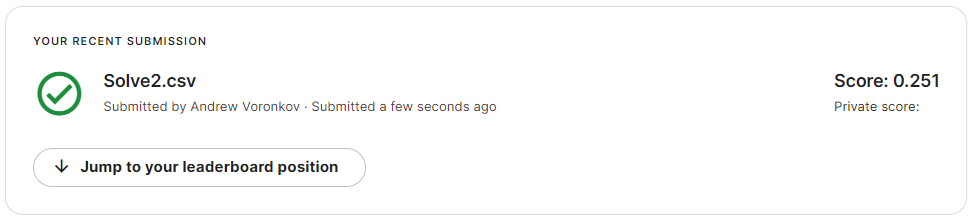